#2. Linear Regression with Single Variable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df=pd.read_csv('/content/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


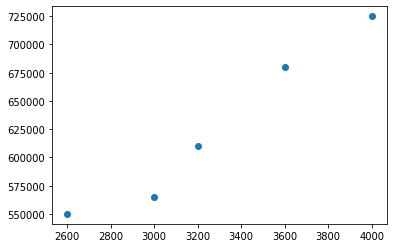

In [ ]:
%matplotlib inline
plt.scatter(df.area, df.price)

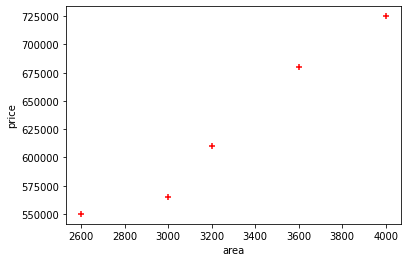

In [ ]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
# Predict price of a home with area = 3300 sqr ft
reg.predict([[3300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [ ]:
#or
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [ ]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [ ]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price) 

LinearRegression()

In [ ]:
# Predict price of a home with area = 3300 sqr ft
reg.predict([[3300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

In [ ]:
# Y = m * X + b (m is coefficient and b is intercept)
3300*135.78767123 + 180616.43835616432

628715.7534151643

#3. Linear Regression with Multiple Variables (Multivariate Regression)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df=pd.read_csv('/content/homeprices2.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
#Data Preprocessing: Fill NA values with median value of a column

In [ ]:
df.bedrooms.median()

4.0

In [ ]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
# Here median is an integer, but in case if we got median as a float value, then:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [ ]:
#Above line can also be written as: reg.fit(df.drop('price',axis='columns'),df.price)

In [ ]:
reg.predict([[3000,3,40]])

# Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

221323.00186540396

In [ ]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540396


498408.251574024

In [ ]:
# pip install word2number
# use above word2number module if 5 is written as five in any of feature column, because usually linear regression model works on numbers.

In [ ]:
# Exercise Problem

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df=pd.read_csv('/content/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=3462835c21f47b7688c51625c78942fc6e8a8fec2529945e075d15b180aa52df
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [ ]:
from word2number import w2n

In [ ]:
w2n.word_to_num('five')

5

In [ ]:
df.experience = df.experience.apply(w2n.word_to_num)

ValueError: ignored

In [ ]:
df.experience

0       NaN
1       NaN
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

# 4. Gradient Descent and Cost Function

In [ ]:
import numpy as np

In [ ]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.001

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, iteration {}".format(m_curr,b_curr,i))


x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 0.062, b 0.018000000000000002, iteration 0
m 0.122528, b 0.035592000000000006, iteration 1
m 0.181618832, b 0.052785648000000004, iteration 2
m 0.239306503808, b 0.069590363712, iteration 3
m 0.29562421854195203, b 0.086015343961728, iteration 4
m 0.35060439367025875, b 0.10206956796255283, iteration 5
m 0.40427867960173774, b 0.11776180246460617, iteration 6
m 0.4566779778357119, b 0.13310060678206653, iteration 7
m 0.5078324586826338, b 0.14809433770148814, iteration 8
m 0.5577715785654069, b 0.16275115427398937, iteration 9
m 0.606524096911324, b 0.17707902249404894, iteration 10
m 0.6541180926443106, b 0.1910857198675929, iteration 11
m 0.7005809802869303, b 0.20477883987199186, iteration 12
m 0.7459395256813859, b 0.2181657963105263, iteration 13
m 0.7902198613385323, b 0.23125382756381693, iteration 14
m 0.8334475014237017, b 0.2440500007406581, iteration 15
m 0.8756473563879363, b 0.25656121573063456, iteration 16
m 0.916843747253018, b 0.2687942091608457, iteration 17
m 0.957

In [ ]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.001

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 0.062, b 0.018000000000000002, cost 89.0, iteration 0
m 0.122528, b 0.035592000000000006, cost 84.881304, iteration 1
m 0.181618832, b 0.052785648000000004, cost 80.955185108544, iteration 2
m 0.239306503808, b 0.069590363712, cost 77.21263768455901, iteration 3
m 0.29562421854195203, b 0.086015343961728, cost 73.64507722605434, iteration 4
m 0.35060439367025875, b 0.10206956796255283, cost 70.2443206760065, iteration 5
m 0.40427867960173774, b 0.11776180246460617, cost 67.00256764921804, iteration 6
m 0.4566779778357119, b 0.13310060678206653, cost 63.912382537082294, iteration 7
m 0.5078324586826338, b 0.14809433770148814, cost 60.966677449199324, iteration 8
m 0.5577715785654069, b 0.16275115427398937, cost 58.15869595270883, iteration 9
m 0.606524096911324, b 0.17707902249404894, cost 55.481997572035766, iteration 10
m 0.6541180926443106, b 0.1910857198675929, cost 52.9304430134884, iteration 11
m 0.7005809802869303, b 0.20477883987199186, cost 50.49818008081245, iteration 12
m 0

In [ ]:
# above cost is reducing in each of the steps.
# but how do we know where to stop?
# Note: once we reach at the global minima, our cost will remain same.

In [ ]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

Streaming output truncated to the last 5000 lines.
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5000
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5001
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5002
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5003
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5004
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5005
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5006
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5007
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5008
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5009
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5010
m 2.0000

In [ ]:
# Plotting or Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
def gradient_descent(x,y):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(10000):
        y_predicted = m_curr * x + b_curr
#         print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

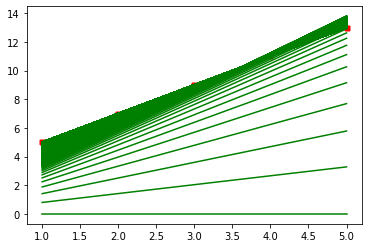

In [ ]:
gradient_descent(x,y)

# 5. Save Model Using Joblib And Pickle

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv("homeprices.csv")
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
model = linear_model.LinearRegression()
model.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
model.predict([[5000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([859554.79452055])

In [ ]:
model.coef_

array([135.78767123])

In [ ]:
model.intercept_

180616.43835616432

In [ ]:
model.predict(5000)

# getting error in this way

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as f:
  pickle.dump(model,f)

In [ ]:
with open('model_pic')